## Web Scraping Project-02

### This project aims at extracting the description of the property, price per square feet, total squarefeet, property facing, number of bedrooms, number of baths, parking availability from the No-Broker.com website

In [1]:
# importing the required packages

import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# Requesting access to the data from the website

url = 'https://www.nobroker.in/property/sale/bangalore/Bangalore/?searchParam=W3sibGF0IjoxMi45Njk5MzM0NDAzNjgxLCJsb24iOjc3LjU5ODE3NzAzMjg1MjIsInBsYWNlSWQiOiJDaElKYlU2MHlYQVdyanNSNEU5LVVlakQzX2ciLCJwbGFjZU5hbWUiOiJCYW5nYWxvcmUiLCJzaG93TWFwIjpmYWxzZX1d&propType=AP&furnishing=FULLY_FURNISHED'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple WeKit /537.36(KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36"
}

webpage = requests.get(url, headers=headers).text
print(webpage)


          <!DOCTYPE html><html lang="en"><head>
          <meta property="fb:pages" content="794951570520699" />
          <link rel="canonical" href="https://www.nobroker.in" />
          
        
          
          <link rel="dns-prefetch preconnect" href="//www.googletagmanager.com">
          <link rel="dns-prefetch preconnect"  href="//www.google-analytics.com">
          <link rel="dns-prefetch" href="//assets.nobroker.in">
          <link rel="dns-prefetch" href="//images.nobroker.in">
          <link rel="dns-prefetch preconnect" href="https://assets.adobedtm.com" />
          <link rel="shortcut icon" id="favicon" href="//assets.nobroker.in/static/img/favicon.png"/>
          <link rel="apple-touch-icon" href="https://images.nobroker.in/static/img/fav64.png">
          <link rel="dns-prefetch preconnect" href="https://hs.nobroker.in">
          <!--<meta charset="utf-8"/>-->
          <meta charset="UTF-8"/>
          <meta name="google-play-app" content="app-id=com.nobrok

In [3]:
# extracts the webpage data in html readable format

soup = BeautifulSoup(webpage, 'lxml')
soup

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch preconnect"/>
<link href="//www.google-analytics.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<link href="https://hs.nobroker.in" rel="dns-prefetch preconnect"/>
<!--<meta charset="utf-8"/>-->
<meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta cont

Selenium is a popular open-source framework and web testing tool that is often used for web scraping, among other tasks. It provides a way to automate interactions with websites and retrieve data from them programmatically. Here are some key points about Selenium in the context of web scraping:

1. **Browser Automation:** Selenium allows you to automate web browsers, such as Google Chrome, Firefox, or Microsoft Edge. It can mimic human interactions with a web page, like clicking links, filling out forms, and navigating through a website.

2. **Dynamic Content:** Selenium is particularly useful for scraping websites with dynamic or JavaScript-driven content. Traditional web scraping tools might struggle with such websites, but Selenium can render and interact with dynamic elements effectively.

3. **Cross-Browser Compatibility:** You can use Selenium to scrape data from multiple web browsers, ensuring that your scraping scripts work across various platforms.

4. **Programming Languages:** Selenium supports various programming languages like Python, Java, C#, and more. This makes it accessible to developers with different language preferences.

5. **Community and Documentation:** Selenium has a large and active community, which means there is extensive documentation, tutorials, and online support available.

6. **Data Extraction:** Once you've automated browser interactions to navigate to the desired web pages, you can use Selenium to extract data from the page's HTML source code. You can parse this data using libraries like BeautifulSoup in Python.

7. **Complex Scraping Scenarios:** Selenium is valuable for scraping scenarios where other methods, such as sending HTTP requests and parsing the responses, are insufficient. This is especially true when dealing with sites that employ heavy JavaScript, AJAX, or user interactions.

However, while Selenium is powerful, it has some drawbacks. It can be slower and resource-intensive compared to other scraping methods. Additionally, it requires a web browser to be open during the scraping process, which may not be ideal for large-scale or continuous scraping.

In summary, Selenium is a versatile tool for web scraping, particularly when dealing with complex, dynamic websites that require interaction with a web browser. It is widely used by developers and data scientists to extract data from websites for various purposes, such as data analysis, research, and automation.

In [17]:
# Installing selenium

!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/fc/df/a8972c41279fc9e9404cad87bc1f4d6d3d824b84c5c072dca0e986a89680/selenium-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/fa/63/0807d3bc1742adffd2bac458829f3f71ce3aa29bec44a8ac008aed2b467c/outcome-1.3.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------------------- 58.3/58.3 kB 1.5 MB/s eta 0:00:00
   ---------------------

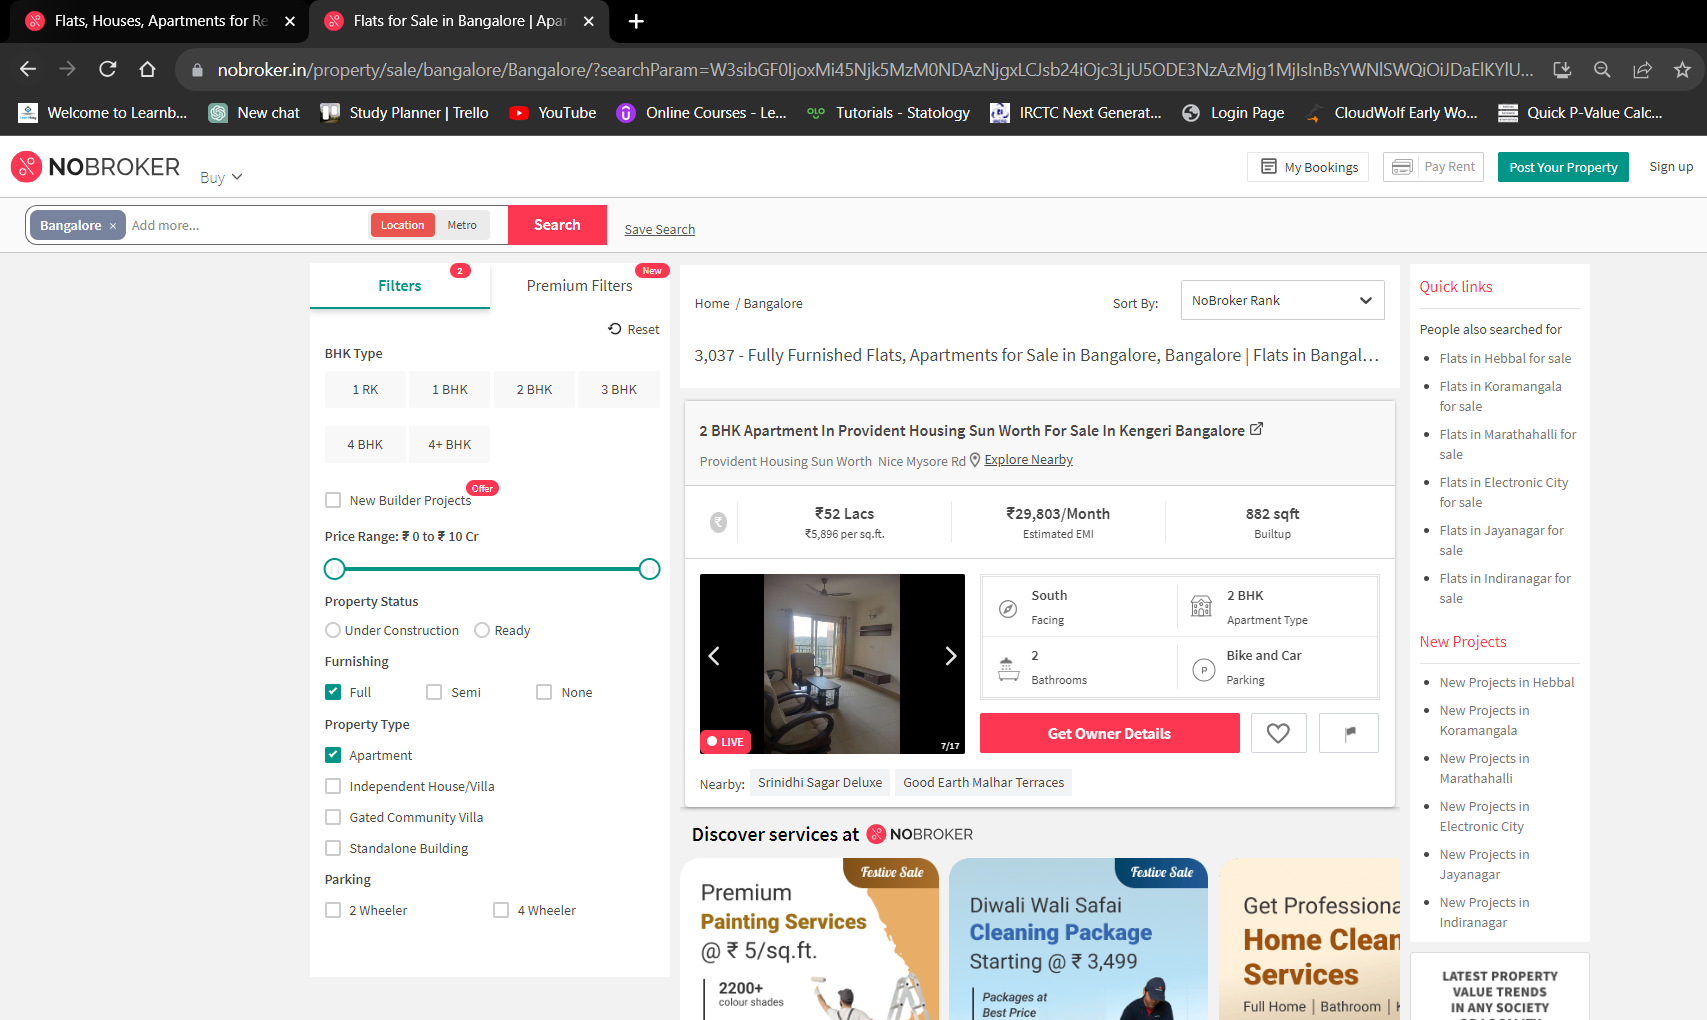

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# Initialize the web driver with Chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("User-Agent=Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple WeKit /537.36(KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36")

driver = webdriver.Chrome(options=chrome_options)

# Open the webpage
driver.get("https://www.nobroker.in/property/sale/bangalore/Bangalore/?searchParam=W3sibGF0IjoxMi45Njk5MzM0NDAzNjgxLCJsb24iOjc3LjU5ODE3NzAzMjg1MjIsInBsYWNlSWQiOiJDaElKYlU2MHlYQVdyanNSNEU5LVVlakQzX2ciLCJwbGFjZU5hbWUiOiJCYW5nYWxvcmUiLCJzaG93TWFwIjpmYWxzZX1d&propType=AP&furnishing=FULLY_FURNISHED")

# Scroll to the end of the page to load all properties
max_scrolls = 10
scroll_count = 0

while scroll_count < max_scrolls:
    try:
        # Scroll down the page
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        # Add a sleep time to allow the page to load new content
        time.sleep(2)
        scroll_count += 1
    except Exception:
        # Break the loop when there's no more content to load
        break

# Parse the HTML content
soup = BeautifulSoup(driver.page_source, 'lxml')

# Find the price per sqft, property sqft facing and other data for all properties on the page
prop_desc = soup.find_all('a', {'class':'overflow-hidden overflow-ellipsis whitespace-nowrap max-w-80pe po:max-w-full'})
description = [i.text.strip() for i in prop_desc]

price_per_sqft = soup.find_all('div', {'class': 'heading-7 flex'})
per_sqft_price = [i.text.strip() for i in price_per_sqft]

prop_sqft = soup.find_all('div', {'class':'font-semi-bold heading-6', 'itemprop':'valueReference', 'id':'minRent'})
sqft = [i.text.strip() for i in prop_sqft]

prop_facing = soup.find_all('div', {'class':'font-semibold'})
facing = [i.text.strip() for i in prop_facing]


# Close the driver when you're done
driver.close()

In [5]:
# Now you have the price per sqft data for all properties
print(description)
print('\n')
print(per_sqft_price)
print('\n')
print(sqft)
print('\n')
print(facing)

['2 BHK Flat  In The Mark Residences For Sale  In Ramamurthy Nagar Bangalore', '2 BHK Apartment  In Provident Housing Sun Worth  For Sale  In Kengeri Bangalore', '2 BHK Flat  In Ascent Apartment For Sale  In Tatanagar Bangalore', '2 BHK Flat  In Green Palms Mallthile For Sale  In Annapurneshwari Nagar Bangalore', '3 BHK Flat  In Skav Aastha For Sale  In Mahalakshmi Layout Bangalore', '4 BHK Flat  In Vibrant Advaitha For Sale  In Yeshwanthpur Bangalore', '2 BHK Apartment  In Bhavya Serene Apartment For Sale  In Kasavanahalli Bangalore', '2 BHK Apartment  In Silicon Splendor For Sale  In Silicon Splendor, Silicon Splendor Apartments, 2nd Main Rd, Beside Mayamma Mallaryya Convention Hall, Sneha Colony, Chikkalasandra, Bengaluru, Karnataka 560061, India Bangalore', '3 BHK Flat  In Sri Manjunatha Regency For Sale  In Kaggadasapura Bangalore', '2 BHK Apartment  In Svs Silver Woods For Sale  In Whitefield Bangalore', '2 BHK Apartment  In Bda Komaghatta Phase 2 For Sale  In Kengeri Satellite T

Now in order to separate the above list data you have into separate lists for facing, number of bedrooms, number of baths, and parking availability

In [6]:
data_list = ['List', 'Map', 'West', '3 BHK', '4', 'Bike and Car', 'Discover services at', 'East', '2 BHK', '2', 'Bike and Car', 'North', '3 BHK', '3', 'Bike and Car', 'North', '3 BHK', '3', 'Car', 'East', '2 BHK', '2', 'Bike and Car', 'West', '2 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Car', 'West', '3 BHK', '2', 'Bike and Car', 'North-East', '2 BHK', '2', 'Bike and Car', 'Explore More Properties', 'North', '3 BHK', '2', 'Car', 'North', '3 BHK', '2', 'Bike and Car', 'North', '2 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Car', 'East', '2 BHK', '2', 'Car', 'West', '2 BHK', '2', 'Car', 'North-West', '3 BHK', '2', 'Bike and Car', 'East', '1 BHK', '1', 'Bike and Car', 'West', '2 BHK', '2', 'Car', 'North', '3 BHK', '2', 'Bike and Car', 'South', '2 BHK', '2', 'Bike and Car', 'West', '2 BHK', '2', 'Bike and Car', 'North', '3 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Car', 'East', '2 BHK', '2', 'Bike', 'East', '3 BHK', '2', 'Bike and Car', 'Explore More Properties', 'North', '2 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Car', 'North', '3 BHK', '4', 'Car', 'North', '3 BHK', '3', 'Car', 'East', '2 BHK', '2', 'Bike and Car', 'West', '3 BHK', '3', 'Bike and Car', 'North', '2 BHK', '2', 'Bike', 'West', '3 BHK', '3', 'Car', 'East', '3 BHK', '3', 'Car', 'South', '2 BHK', '2', 'Bike and Car', 'North', '2 BHK', '2', 'Bike and Car', 'East', '3 BHK', '3', 'Car', 'North', '2 BHK', '2', 'Bike and Car', 'West', '3 BHK', '2', 'Bike and Car', 'East', '2 BHK', '2', 'Car', 'West', '3 BHK', '2', 'Bike and Car', 'West', '1 BHK', '1', 'Bike and Car', 'West', '3 BHK', '3', 'Bike and Car', 'North-East', '4 BHK', '4', 'Car', 'East', '3 BHK', '3', 'Car', 'East', '2 BHK', '2', 'Bike and Car', 'West', '3 BHK', '2', 'Bike and Car', 'North', '3 BHK', '2', 'Car', 'East', '2 BHK', '2', 'Bike and Car']

# Initialize lists to store the separated data
facing_list = []
bedroom_list = []
bath_list = []
parking_list = []

# Loop through the data list
for item in data_list:
    # Check if the item represents facing (e.g., 'North', 'East', etc.)
    if item in ['North', 'East', 'West', 'South', 'North-East', 'North-West']:
        facing_list.append(item)
    # Check if the item represents the number of bedrooms (e.g., '2 BHK', '3 BHK', etc.)
    elif item.endswith('BHK'):
        bedroom_list.append(item)
    # Check if the item represents the number of baths (e.g., '2', '3', etc.)
    elif item.isdigit() and int(item) >= 1:
        bath_list.append(item)
    # Check if the item represents parking availability (e.g., 'Bike and Car', 'Car', 'Bike', etc.)
    elif item in ['Bike and Car', 'Car', 'Bike']:
        parking_list.append(item)

# Print the separated data
print("Facing:", facing_list)
print("Bedrooms:", bedroom_list)
print("Baths:", bath_list)
print("Parking Availability:", parking_list)


Facing: ['West', 'East', 'North', 'North', 'East', 'West', 'East', 'West', 'North-East', 'North', 'North', 'North', 'East', 'East', 'West', 'North-West', 'East', 'West', 'North', 'South', 'West', 'North', 'East', 'East', 'East', 'East', 'North', 'East', 'North', 'North', 'East', 'West', 'North', 'West', 'East', 'South', 'North', 'East', 'North', 'West', 'East', 'West', 'West', 'West', 'North-East', 'East', 'East', 'West', 'North', 'East']
Bedrooms: ['3 BHK', '2 BHK', '3 BHK', '3 BHK', '2 BHK', '2 BHK', '2 BHK', '3 BHK', '2 BHK', '3 BHK', '3 BHK', '2 BHK', '2 BHK', '2 BHK', '2 BHK', '3 BHK', '1 BHK', '2 BHK', '3 BHK', '2 BHK', '2 BHK', '3 BHK', '2 BHK', '2 BHK', '2 BHK', '3 BHK', '2 BHK', '2 BHK', '3 BHK', '3 BHK', '2 BHK', '3 BHK', '2 BHK', '3 BHK', '3 BHK', '2 BHK', '2 BHK', '3 BHK', '2 BHK', '3 BHK', '2 BHK', '3 BHK', '1 BHK', '3 BHK', '4 BHK', '3 BHK', '2 BHK', '3 BHK', '3 BHK', '2 BHK']
Baths: ['4', '2', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2'

In [7]:
print(len(description))
print(len(per_sqft_price)) ### To be filtered
print(len(sqft))
print(len(facing_list))
print(len(bedroom_list))
print(len(bath_list))
print(len(parking_list))

50
100
50
50
50
50
50


In [8]:
# Need to filter per_sqft_price:

sqft_price = []

for price in per_sqft_price:
    if price.endswith('per sq.ft.'):
        sqft_price.append(price)

In [9]:
print(len(sqft_price))
print('\n')
print(sqft_price)

50


['₹6,250 per sq.ft.', '₹5,896 per sq.ft.', '₹5,662 per sq.ft.', '₹5,826 per sq.ft.', '₹12,671 per sq.ft.', '₹9,032 per sq.ft.', '₹7,054 per sq.ft.', '₹7,707 per sq.ft.', '₹6,402 per sq.ft.', '₹8,880 per sq.ft.', '₹4,167 per sq.ft.', '₹7,760 per sq.ft.', '₹8,434 per sq.ft.', '₹3,812 per sq.ft.', '₹5,517 per sq.ft.', '₹6,155 per sq.ft.', '₹6,541 per sq.ft.', '₹10,345 per sq.ft.', '₹9,840 per sq.ft.', '₹7,433 per sq.ft.', '₹6,861 per sq.ft.', '₹6,316 per sq.ft.', '₹4,545 per sq.ft.', '₹17,000 per sq.ft.', '₹6,536 per sq.ft.', '₹6,429 per sq.ft.', '₹9,766 per sq.ft.', '₹11,077 per sq.ft.', '₹6,667 per sq.ft.', '₹10,684 per sq.ft.', '₹13,505 per sq.ft.', '₹11,236 per sq.ft.', '₹4,641 per sq.ft.', '₹5,624 per sq.ft.', '₹11,429 per sq.ft.', '₹7,513 per sq.ft.', '₹8,503 per sq.ft.', '₹5,238 per sq.ft.', '₹6,044 per sq.ft.', '₹4,937 per sq.ft.', '₹7,414 per sq.ft.', '₹6,120 per sq.ft.', '₹9,060 per sq.ft.', '₹10,526 per sq.ft.', '₹6,019 per sq.ft.', '₹3,889 per sq.ft.', '₹6,100 per sq.ft.'

In [10]:
# Creating a dataframe to convert the scaped data into a table:

df = pd.DataFrame({'Property_description':description, 'Price_per_sqft':sqft_price, 'Total_sqft':sqft, 
                   'Facing':facing_list, 'No_of_Bedrooms':bedroom_list, 'No_of_Baths':bath_list, 
                   'Parking_availability':parking_list})

In [11]:
df

,Property_description,Price_per_sqft,Total_sqft,Facing,No_of_Bedrooms,No_of_Baths,Parking_availability
0,2 BHK Flat In The Mark Residences For Sale I...,"₹6,250 per sq.ft.","1,200 sqft",West,3 BHK,4,Bike and Car
1,2 BHK Apartment In Provident Housing Sun Wort...,"₹5,896 per sq.ft.",882 sqft,East,2 BHK,2,Bike and Car
2,2 BHK Flat In Ascent Apartment For Sale In T...,"₹5,662 per sq.ft.","1,307 sqft",North,3 BHK,3,Bike and Car
3,2 BHK Flat In Green Palms Mallthile For Sale ...,"₹5,826 per sq.ft.","1,150 sqft",North,3 BHK,3,Car
4,3 BHK Flat In Skav Aastha For Sale In Mahala...,"₹12,671 per sq.ft.","1,973 sqft",East,2 BHK,2,Bike and Car
5,4 BHK Flat In Vibrant Advaitha For Sale In Y...,"₹9,032 per sq.ft.","2,768 sqft",West,2 BHK,2,Bike and Car
6,2 BHK Apartment In Bhavya Serene Apartment Fo...,"₹7,054 per sq.ft.","1,205 sqft",East,2 BHK,2,Car
7,2 BHK Apartment In Silicon Splendor For Sale ...,"₹7,707 per sq.ft.","1,025 sqft",West,3 BHK,2,Bike and Car
8,3 BHK Flat In Sri Manjunatha Regency For Sale...,"₹6,402 per sq.ft.","1,484 sqft",North-East,2 BHK,2,Bike and Car
9,2 BHK Apartment In Svs Silver Woods For Sale ...,"₹8,880 per sq.ft.","1,295 sqft",North,3 BHK,2,Car


In [12]:
# Splitting the values in the below columns to remove the non numeric data:

df['Price_per_sqft'] = df['Price_per_sqft'].apply(lambda x : x.split()[0])
df['Total_sqft'] = df['Total_sqft'].apply(lambda x : x.split()[0])

In [13]:
# Further filtering the values by removing the '₹' and ',' signs.

df['Price_per_sqft'] = df['Price_per_sqft'].str.replace('₹', '').str.replace(',','', regex=True)
df['Total_sqft'] = df['Total_sqft'].str.replace(',','', regex=True)

In [14]:
# Now converting the data from object type to numeric datatype.

df['Price_per_sqft'] = pd.to_numeric(df['Price_per_sqft'], errors='coerce')
df['Total_sqft'] = pd.to_numeric(df['Total_sqft'], errors='coerce')

In [15]:
df

,Property_description,Price_per_sqft,Total_sqft,Facing,No_of_Bedrooms,No_of_Baths,Parking_availability
0,2 BHK Flat In The Mark Residences For Sale I...,6250,1200,West,3 BHK,4,Bike and Car
1,2 BHK Apartment In Provident Housing Sun Wort...,5896,882,East,2 BHK,2,Bike and Car
2,2 BHK Flat In Ascent Apartment For Sale In T...,5662,1307,North,3 BHK,3,Bike and Car
3,2 BHK Flat In Green Palms Mallthile For Sale ...,5826,1150,North,3 BHK,3,Car
4,3 BHK Flat In Skav Aastha For Sale In Mahala...,12671,1973,East,2 BHK,2,Bike and Car
5,4 BHK Flat In Vibrant Advaitha For Sale In Y...,9032,2768,West,2 BHK,2,Bike and Car
6,2 BHK Apartment In Bhavya Serene Apartment Fo...,7054,1205,East,2 BHK,2,Car
7,2 BHK Apartment In Silicon Splendor For Sale ...,7707,1025,West,3 BHK,2,Bike and Car
8,3 BHK Flat In Sri Manjunatha Regency For Sale...,6402,1484,North-East,2 BHK,2,Bike and Car
9,2 BHK Apartment In Svs Silver Woods For Sale ...,8880,1295,North,3 BHK,2,Car


In [16]:
# Create a new column 'Total_price' by multiplying 'Price_per_sqft' and 'Total_sqft'
df['Total_price'] = df['Price_per_sqft'] * df['Total_sqft']

In [17]:
# Displaying the updated DataFrame

df

,Property_description,Price_per_sqft,Total_sqft,Facing,No_of_Bedrooms,No_of_Baths,Parking_availability,Total_price
0,2 BHK Flat In The Mark Residences For Sale I...,6250,1200,West,3 BHK,4,Bike and Car,7500000
1,2 BHK Apartment In Provident Housing Sun Wort...,5896,882,East,2 BHK,2,Bike and Car,5200272
2,2 BHK Flat In Ascent Apartment For Sale In T...,5662,1307,North,3 BHK,3,Bike and Car,7400234
3,2 BHK Flat In Green Palms Mallthile For Sale ...,5826,1150,North,3 BHK,3,Car,6699900
4,3 BHK Flat In Skav Aastha For Sale In Mahala...,12671,1973,East,2 BHK,2,Bike and Car,24999883
5,4 BHK Flat In Vibrant Advaitha For Sale In Y...,9032,2768,West,2 BHK,2,Bike and Car,25000576
6,2 BHK Apartment In Bhavya Serene Apartment Fo...,7054,1205,East,2 BHK,2,Car,8500070
7,2 BHK Apartment In Silicon Splendor For Sale ...,7707,1025,West,3 BHK,2,Bike and Car,7899675
8,3 BHK Flat In Sri Manjunatha Regency For Sale...,6402,1484,North-East,2 BHK,2,Bike and Car,9500568
9,2 BHK Apartment In Svs Silver Woods For Sale ...,8880,1295,North,3 BHK,2,Car,11499600


The above data can further be utilised for data analysis, model building and deployment into production (Once a sufficient amount of data is collected using this approach).